<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Problem-Statement" data-toc-modified-id="Problem-Statement-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem Statement</a></span></li><li><span><a href="#Dataset-Description" data-toc-modified-id="Dataset-Description-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Dataset Description</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span></li><li><span><a href="#Data-preprocessing" data-toc-modified-id="Data-preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Data preprocessing</a></span></li><li><span><a href="#Model-Training" data-toc-modified-id="Model-Training-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Model Training</a></span></li><li><span><a href="#Test-set-preprocessing" data-toc-modified-id="Test-set-preprocessing-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Test set preprocessing</a></span></li><li><span><a href="#Test-set-prediction" data-toc-modified-id="Test-set-prediction-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Test set prediction</a></span></li></ul></div>

# Problem Statement

The company has been collecting information about the prices of used cars in an excel workbook.

This data set consists of three types of entities:

The specification of an auto in terms of various characteristics
The assigned insurance risk rating
Normalized losses in use as compared to other cars

The second rating corresponds to the degree to which the auto is riskier than its price indicates.

Cars are initially assigned a risk factor symbol associated with its price.
Then, if it is more or less risky this symbol is adjusted by moving it up or down the scale.
Actuarius calls this process "symbolling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year.

This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc…), and represents the average loss per car per year.

The dataset is divided into two parts: Train, and Test sets.

Train Set:
The train set contains 181 rows and 27 columns.
The last column price is the target variable.

Test Set:
The test set contains 20 rows and 26 columns.
The test set doesn’t contain the price column.
It needs to be predicted for the test set.


# Dataset Description

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('car_train.csv')

In [ ]:
df.head()

,ID,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,-1,65,toyota,gas,std,four,hatchback,fwd,front,102.4,175.6,66.5,53.9,2458,ohc,four,122,mpfi,3.31,3.54,8.7,92,4200,27,32,11248
1,2,0,188,bmw,gas,std,two,sedan,rwd,front,101.2,176.8,64.8,54.3,2710,ohc,six,164,mpfi,3.31,3.19,9.0,121,4250,21,28,20970
2,3,0,?,renault,gas,std,four,wagon,fwd,front,96.1,181.5,66.5,55.2,2579,ohc,four,132,mpfi,3.46,3.9,8.7,?,?,23,31,9295
3,4,0,161,peugot,diesel,turbo,four,sedan,rwd,front,107.9,186.7,68.4,56.7,3197,l,four,152,idi,3.7,3.52,21.0,95,4150,28,33,13200
4,5,-2,103,volvo,gas,std,four,sedan,rwd,front,104.3,188.8,67.2,56.2,2935,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,24,28,15985


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  181 non-null    object 
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       181 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [ ]:
df.isnull().sum()

ID                   0
symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
sym= (df == 0).sum()
sym

ID                    0
symboling            59
normalized-losses     0
make                  0
fuel-type             0
aspiration            0
num-of-doors          0
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  0
stroke                0
compression-ratio     0
horsepower            0
peak-rpm              0
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [ ]:
ques= (df == '?').sum()
ques

ID                    0
symboling             0
normalized-losses    34
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [18]:
df.replace('?', np.nan, inplace = True)

In [19]:
cols=['normalized-losses','bore','stroke','horsepower','peak-rpm']
for col in cols:
    df[col] = df[col].astype('float')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 181 non-null    int64  
 1   symboling          181 non-null    int64  
 2   normalized-losses  147 non-null    float64
 3   make               181 non-null    object 
 4   fuel-type          181 non-null    object 
 5   aspiration         181 non-null    object 
 6   num-of-doors       179 non-null    object 
 7   body-style         181 non-null    object 
 8   drive-wheels       181 non-null    object 
 9   engine-location    181 non-null    object 
 10  wheel-base         181 non-null    float64
 11  length             181 non-null    float64
 12  width              181 non-null    float64
 13  height             181 non-null    float64
 14  curb-weight        181 non-null    int64  
 15  engine-type        181 non-null    object 
 16  num-of-cylinders   181 non

In [62]:
df.drop(columns=['ID'],inplace=True)

In [20]:
missing_val=['normalized-losses','bore','stroke','horsepower','peak-rpm']

In [21]:
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer(n_neighbors=3, weights="uniform")
df[(missing_val)] = knn_imputer.fit_transform(df[(missing_val)])

In [64]:
df=df.dropna()

In [ ]:
df.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,122.342644,98.756983,174.248045,65.952514,53.717318,2566.927374,128.100559,3.330838,3.276201,10.098436,104.860335,5105.865922,25.078212,30.586592,13311.480447
std,34.192841,6.138833,12.337826,2.151726,2.497275,525.592422,42.755523,0.270347,0.308523,3.887534,38.087828,471.230405,6.401766,6.874235,8142.020953
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.680000,2.190000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.000000,94.500000,166.800000,64.200000,51.800000,2179.500000,98.000000,3.150000,3.115000,8.600000,72.500000,4800.000000,19.000000,25.000000,7775.000000
50%,118.000000,96.900000,173.200000,65.500000,54.100000,2420.000000,120.000000,3.310000,3.350000,9.000000,95.000000,5100.000000,24.000000,30.000000,10295.000000
75%,150.000000,102.400000,183.300000,66.750000,55.500000,2943.500000,146.000000,3.590000,3.460000,9.400000,121.000000,5500.000000,30.000000,34.000000,16501.500000
max,256.000000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 180
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   symboling          179 non-null    category
 1   normalized-losses  179 non-null    float64 
 2   make               179 non-null    object  
 3   fuel-type          179 non-null    object  
 4   aspiration         179 non-null    object  
 5   num-of-doors       179 non-null    object  
 6   body-style         179 non-null    object  
 7   drive-wheels       179 non-null    object  
 8   engine-location    179 non-null    object  
 9   wheel-base         179 non-null    float64 
 10  length             179 non-null    float64 
 11  width              179 non-null    float64 
 12  height             179 non-null    float64 
 13  curb-weight        179 non-null    int64   
 14  engine-type        179 non-null    object  
 15  num-of-cylinders   179 non-null    object  
 16  engine-s

In [65]:
cat=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [66]:
num=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg','price']

In [67]:
for col in cat:
    df[col] = df[col].astype('category')

# EDA

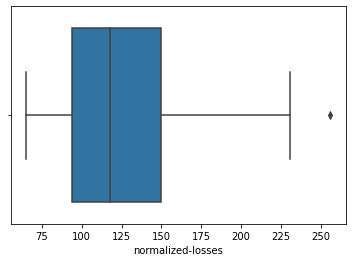

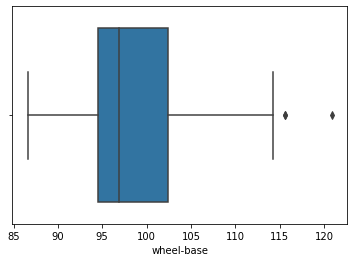

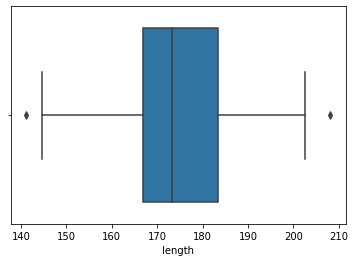

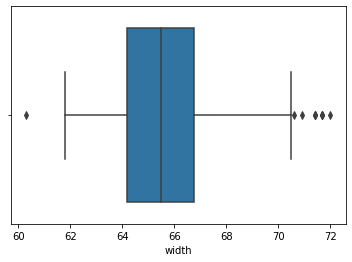

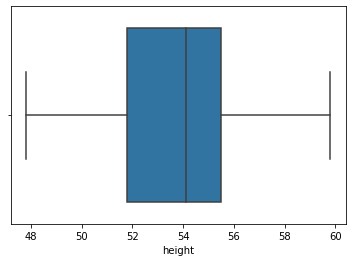

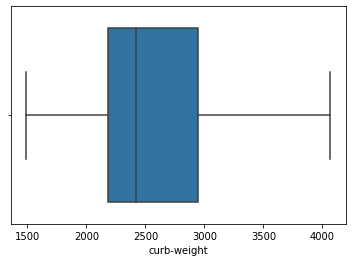

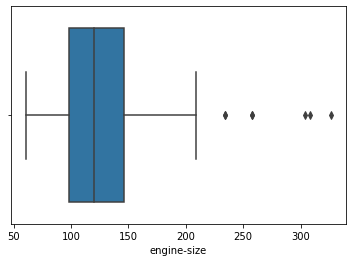

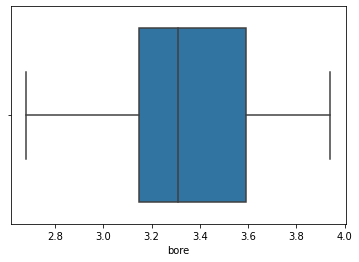

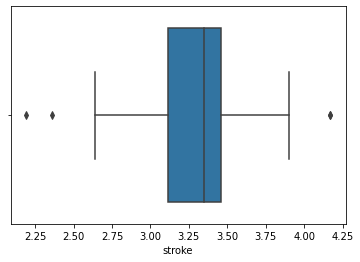

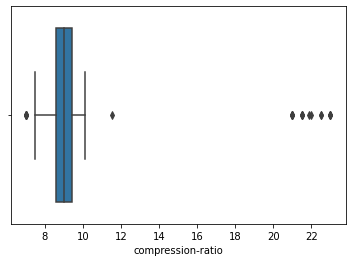

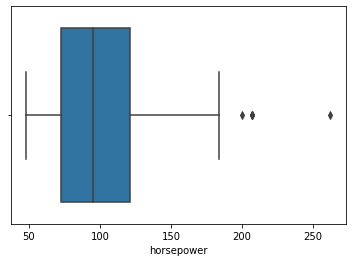

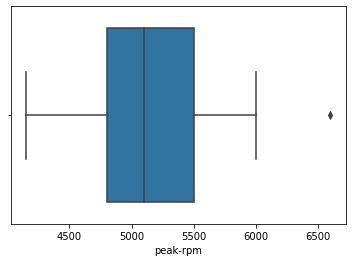

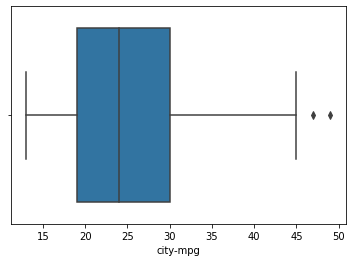

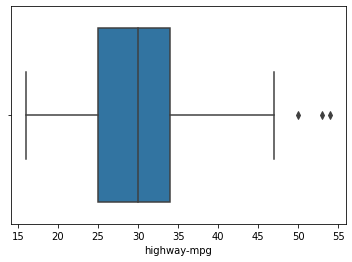

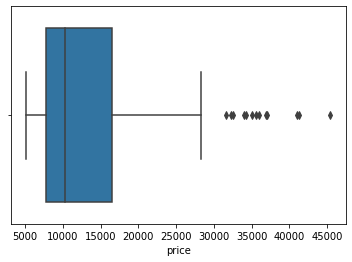

In [ ]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.boxplot(df[col])

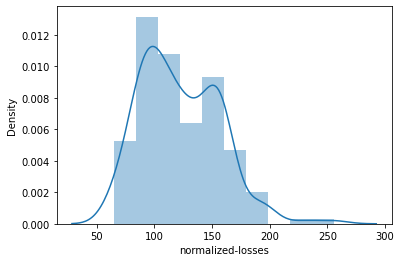

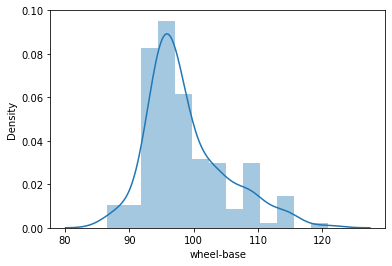

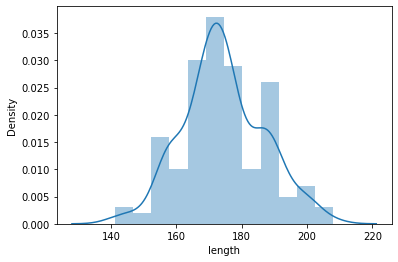

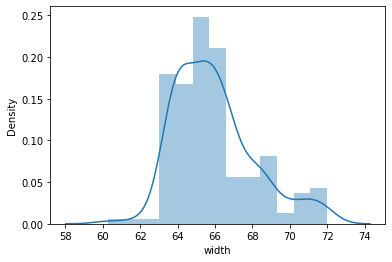

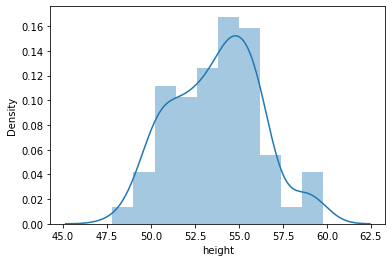

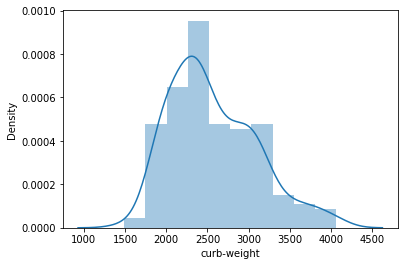

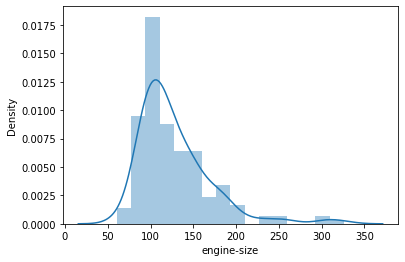

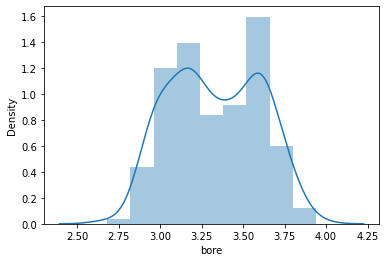

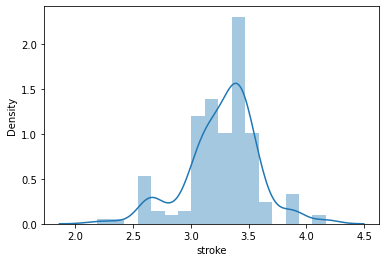

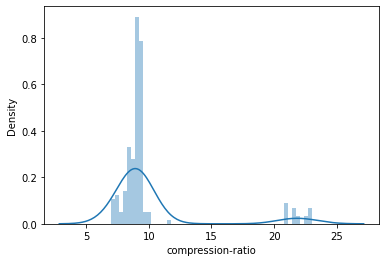

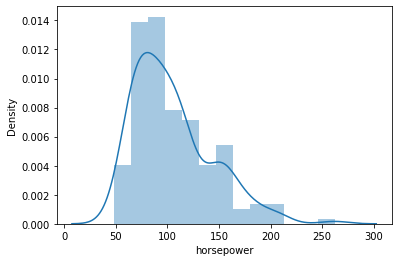

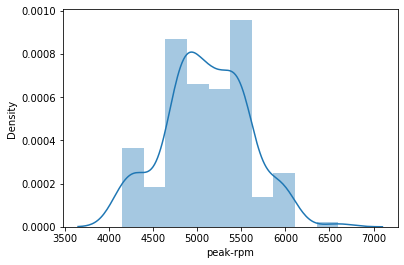

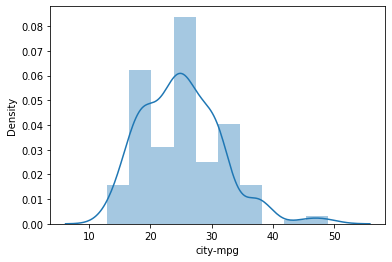

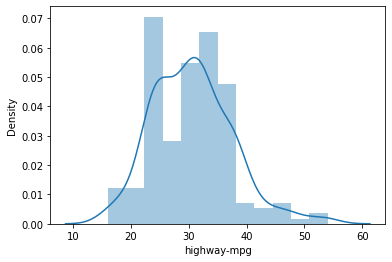

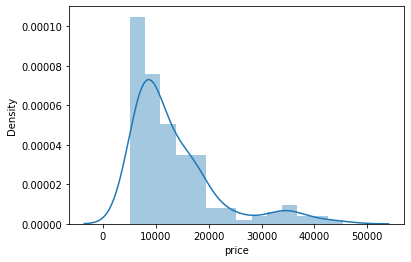

In [ ]:
for i, col in enumerate(df[(num)]):
    plt.figure(i)
    sns.distplot(df[col])

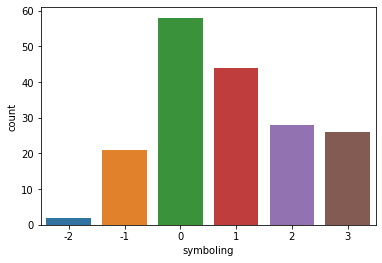

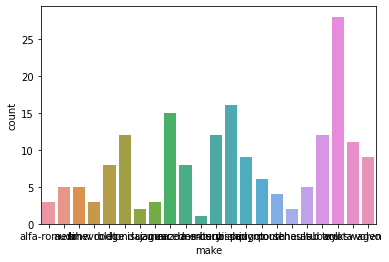

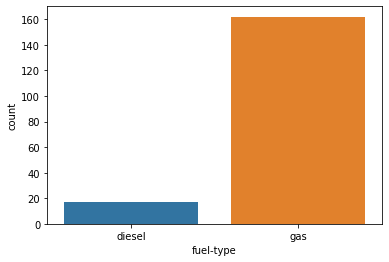

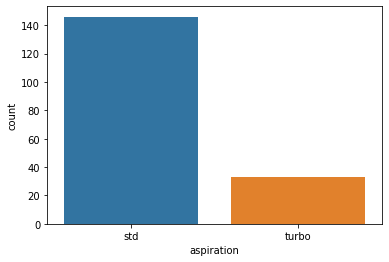

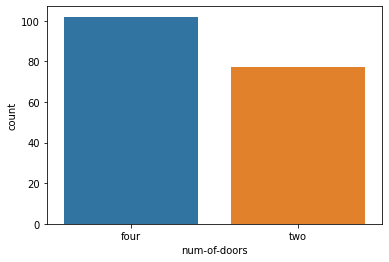

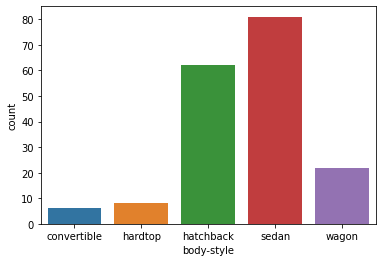

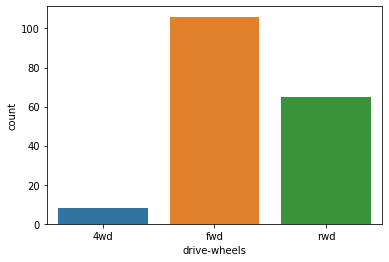

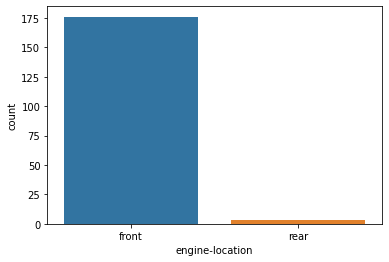

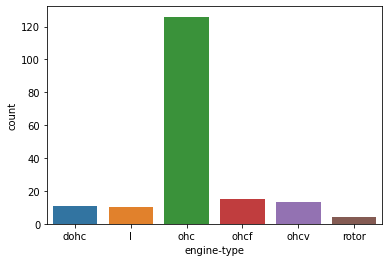

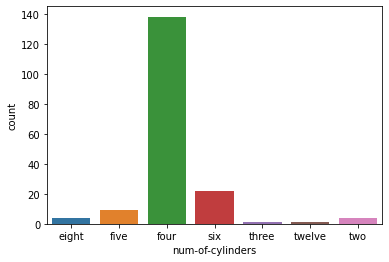

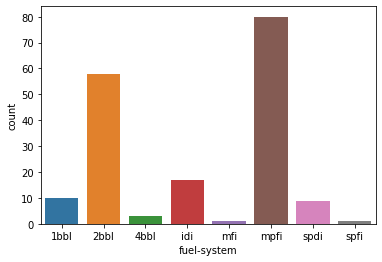

In [ ]:
for i, col in enumerate(df[(cat)]):
    plt.figure(i)
    sns.countplot(df[col])

<AxesSubplot:xlabel='make', ylabel='price'>

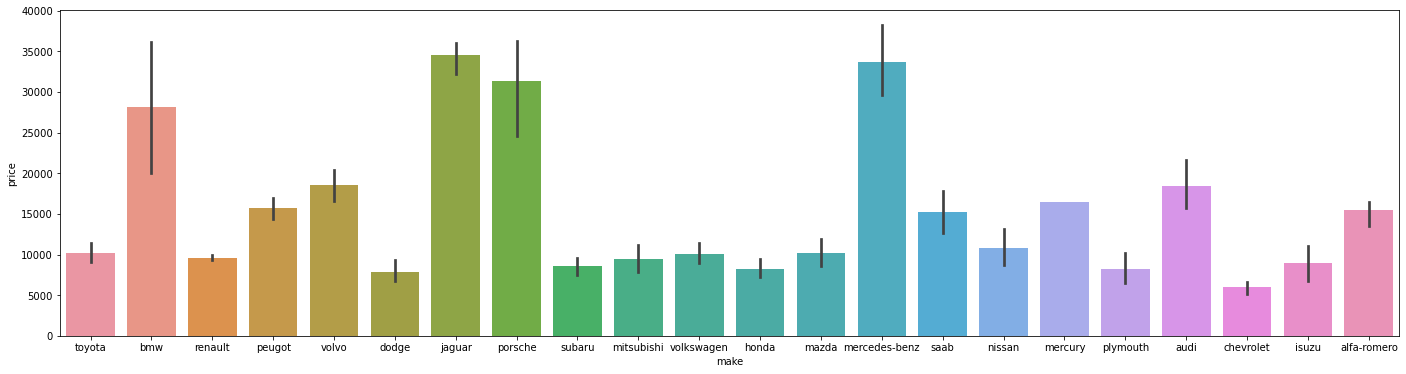

In [4]:
fig, ax = plt.subplots(figsize=(24,6))
sns.barplot(data=df, x='make',y='price',ax=ax)

In [5]:
df['drive-wheels'].value_counts()

fwd    108
rwd     65
4wd      8
Name: drive-wheels, dtype: int64

In [6]:
df['num-of-doors'].value_counts()

four    102
two      77
?         2
Name: num-of-doors, dtype: int64

In [24]:
df.symboling.value_counts()

 0    59
 1    45
 2    28
 3    26
-1    21
-2     2
Name: symboling, dtype: int64

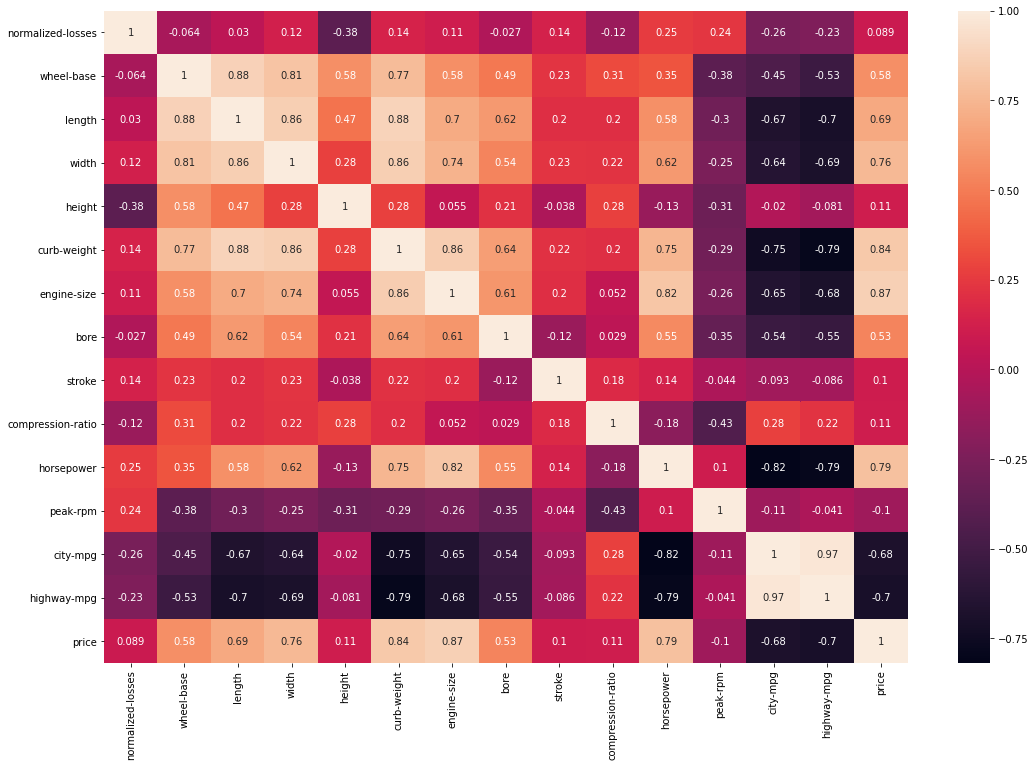

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,12))
corr=df.corr()
sns.heatmap(corr,data=df,annot=True)

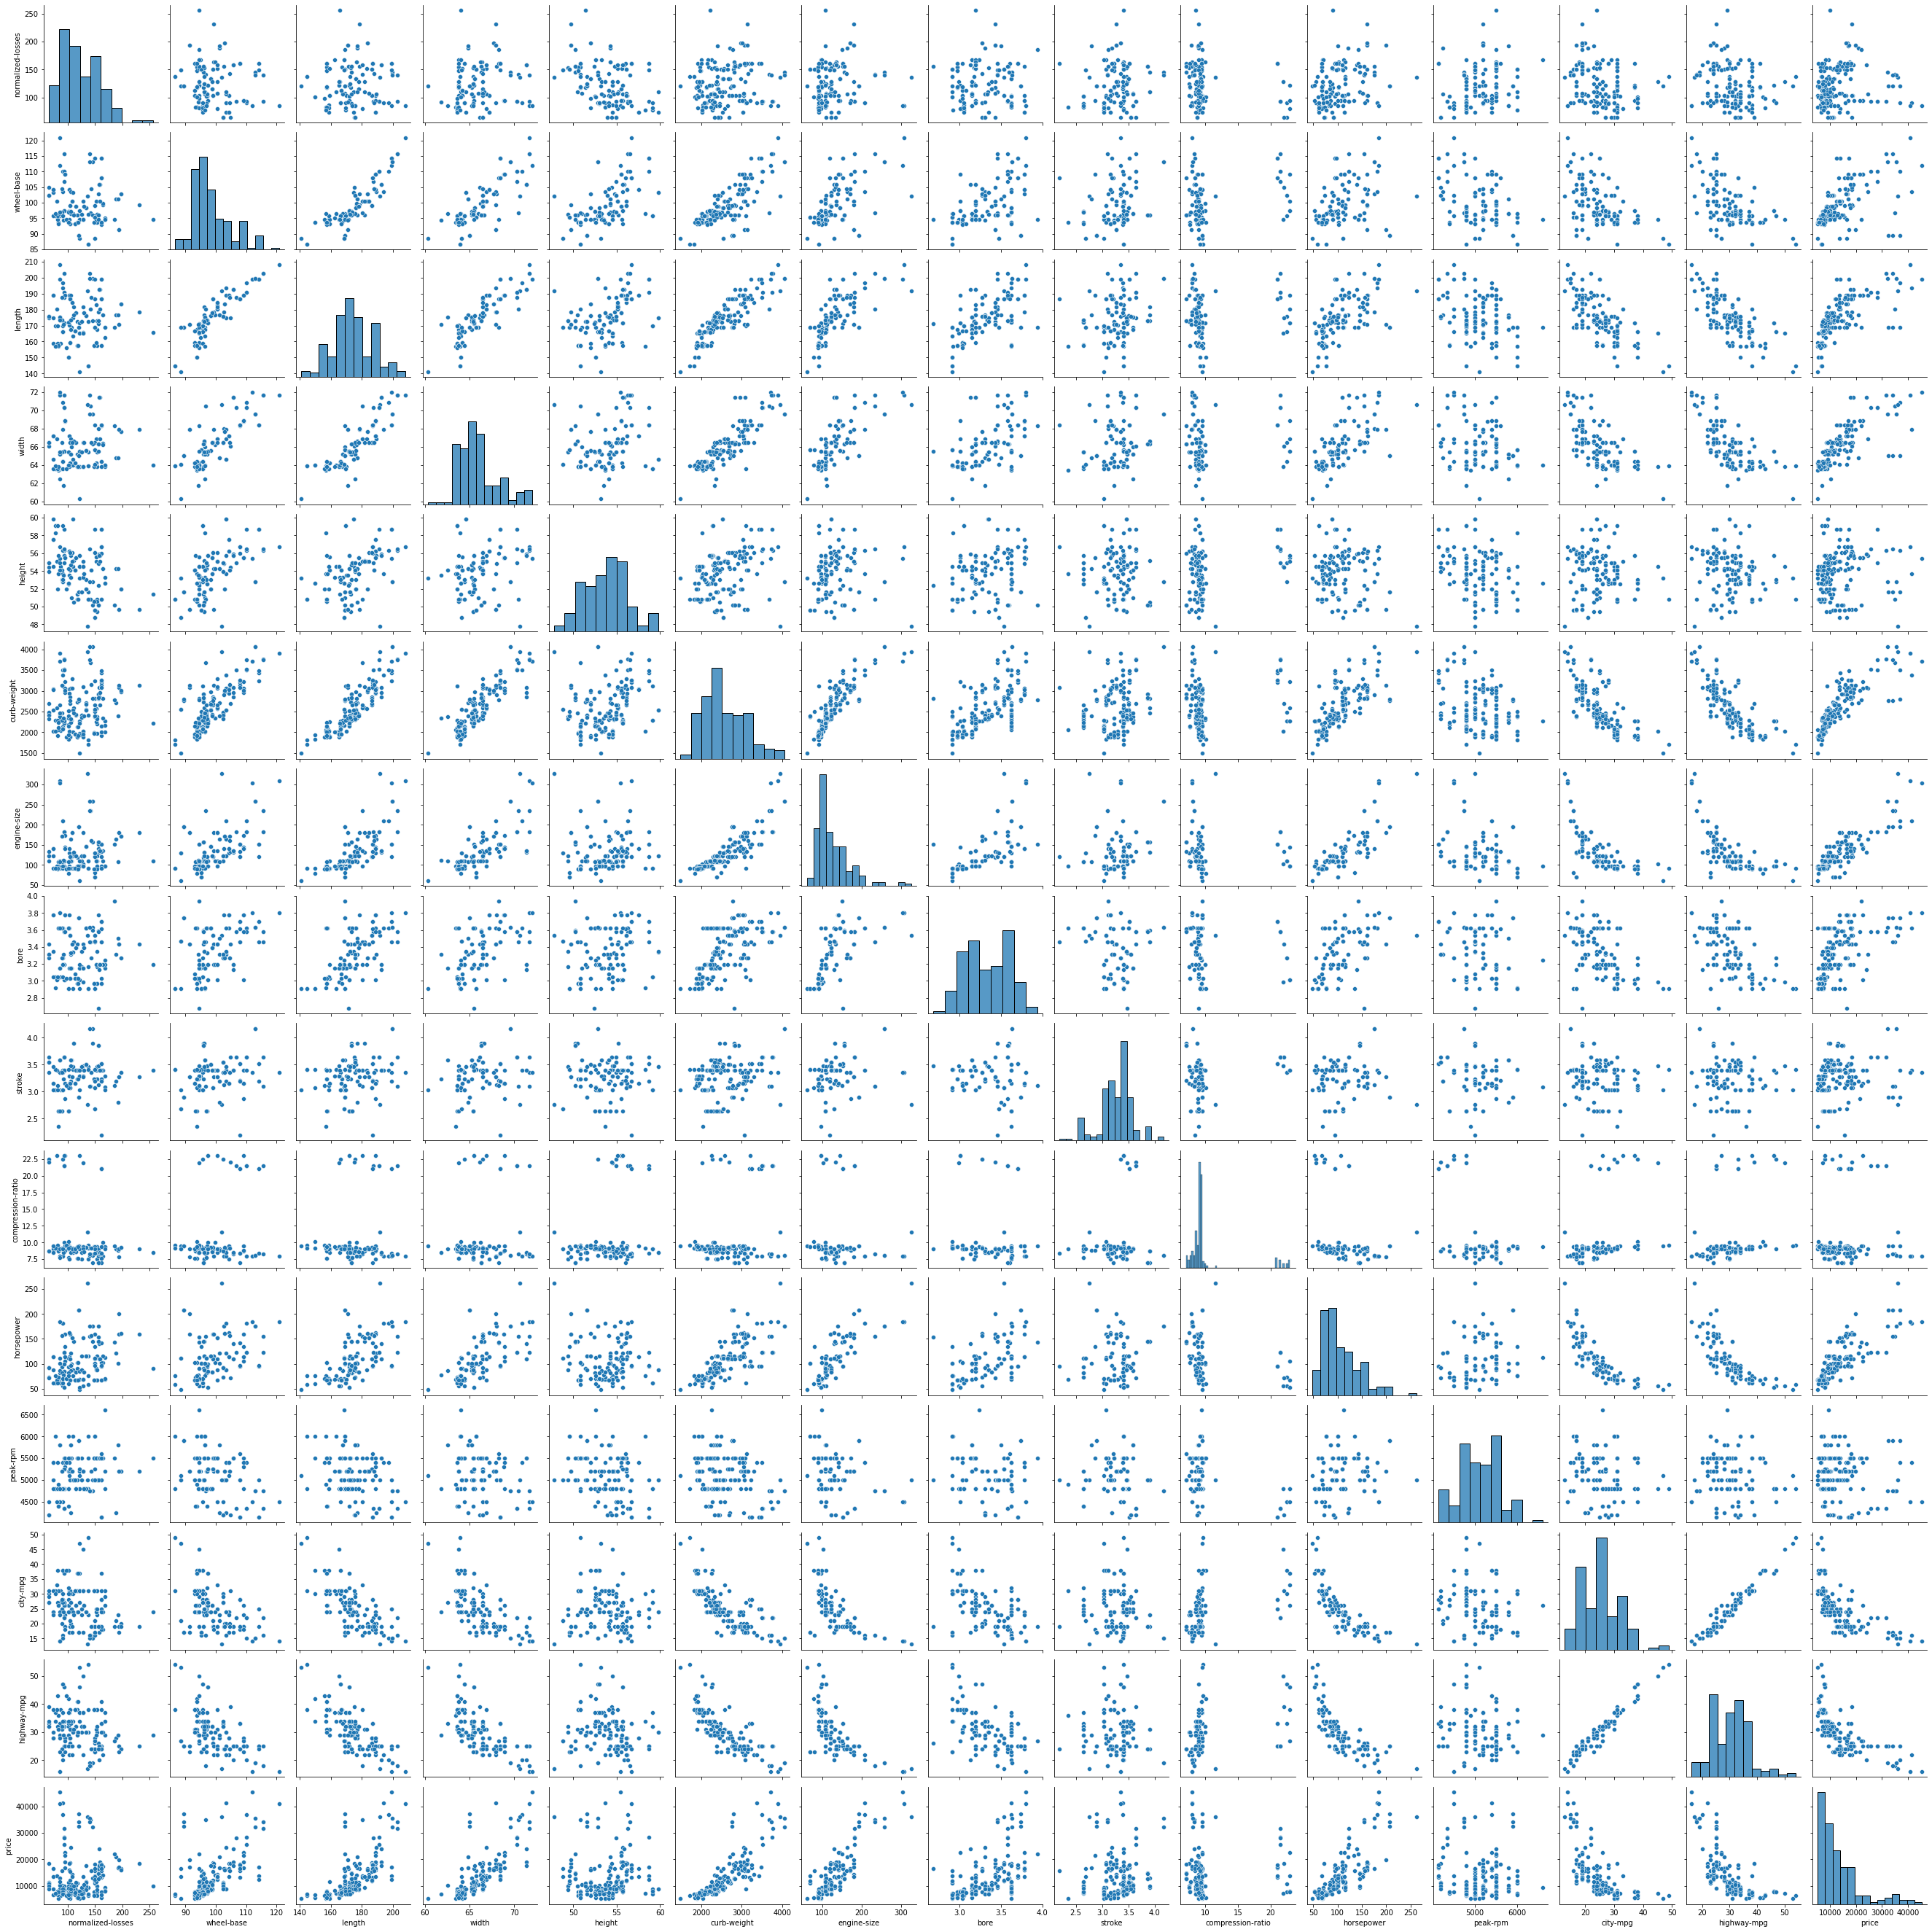

In [ ]:
sns.pairplot(df)

# Data preprocessing

In [68]:
num.remove('price')

In [69]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[(num)]=scaler.fit_transform(df[(num)])

In [ ]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,-1,-1.681741,toyota,gas,std,four,hatchback,fwd,front,0.595103,0.109885,0.255154,0.073358,-0.207828,ohc,four,-0.143085,mpfi,-0.077295,0.857436,-0.360732,-0.338597,-1.927734,0.301039,0.206186,11248
1,0,1.925594,bmw,gas,std,two,sedan,rwd,front,0.399077,0.207420,-0.537126,0.233981,0.272976,ohc,six,0.842000,mpfi,-0.077295,-0.280183,-0.283346,0.424937,-1.821331,-0.638832,-0.377329,20970
2,0,-0.352208,renault,gas,std,four,wagon,fwd,front,-0.434030,0.589431,0.255154,0.595385,0.023034,ohc,four,0.091459,mpfi,0.479104,2.027557,-0.360732,1.056827,-0.225289,-0.325542,0.060307,9295
3,0,1.133740,peugot,diesel,turbo,four,sedan,rwd,front,1.493551,1.012081,1.140643,1.197725,1.202148,l,four,0.560547,idi,1.369342,0.792429,2.812102,-0.259610,-2.034137,0.457684,0.352065,13200
4,-2,-0.567280,volvo,gas,std,four,sedan,rwd,front,0.905476,1.182767,0.581387,0.996945,0.702265,ohc,four,0.302549,mpfi,1.666088,-0.410196,-0.154369,0.240636,0.625934,-0.168897,-0.377329,15985


In [70]:
X = df.drop(columns=['price'], axis=1)
y = df['price']

In [73]:
from category_encoders import OrdinalEncoder
oe = OrdinalEncoder( handle_unknown='ignore',cols=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system'])
X = oe.fit_transform(X)

In [74]:
X.shape

(179, 25)

In [75]:
y.shape

(179,)

# Model Training

In [76]:
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
def train(model, X, y):
    # train the model
    x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=42)
    model.fit(x_train, y_train)
    
    # predict the training set
    pred = model.predict(x_test)
    
    # perform cross-validation
    cv_score = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=5)
    cv_score = np.abs(np.mean(cv_score))
    
    print("Model Report")
    print("RMSE:",np.sqrt(mean_squared_error(y_test, pred)))
    print('CV Score:', cv_score)

Model Report
RMSE: 3787.1700206692153
CV Score: 3129.6678895549767


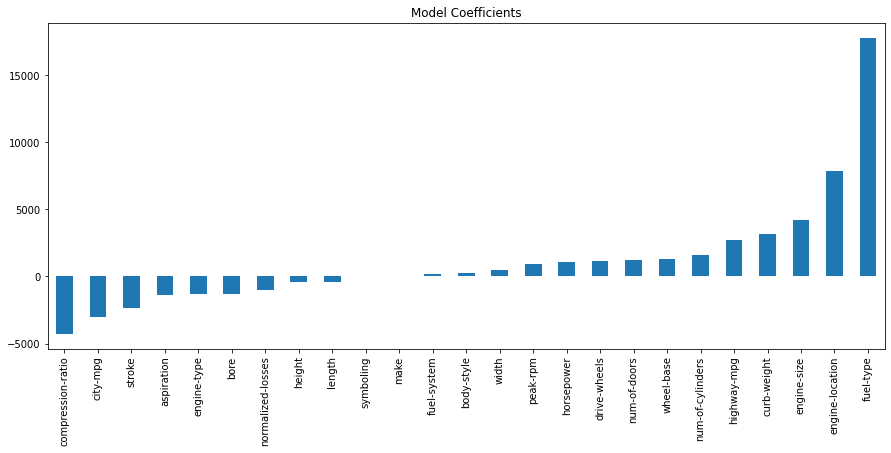

In [77]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(15,6))
coef.plot(kind='bar', title="Model Coefficients")



Model Report
RMSE: 4016.2568832506627
CV Score: 3083.249826378486


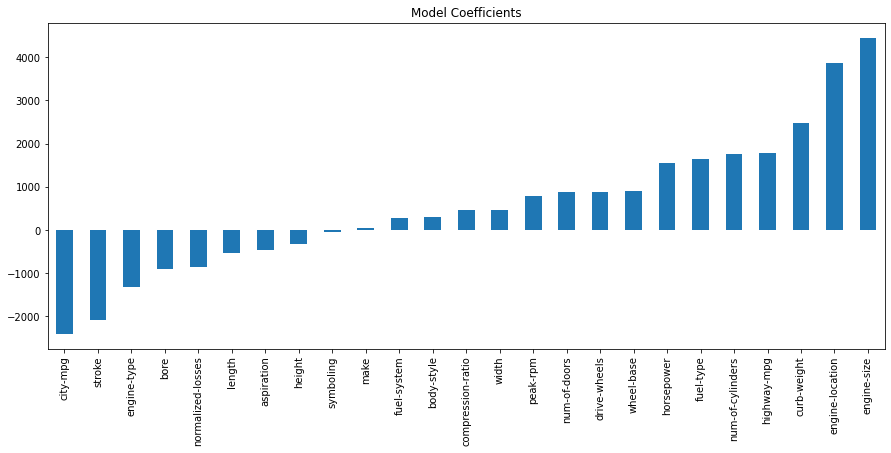

In [78]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
model = Ridge()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(15,6))
coef.plot(kind='bar', title="Model Coefficients")

Model Report
RMSE: 3788.0907575458486
CV Score: 3119.4307543796176


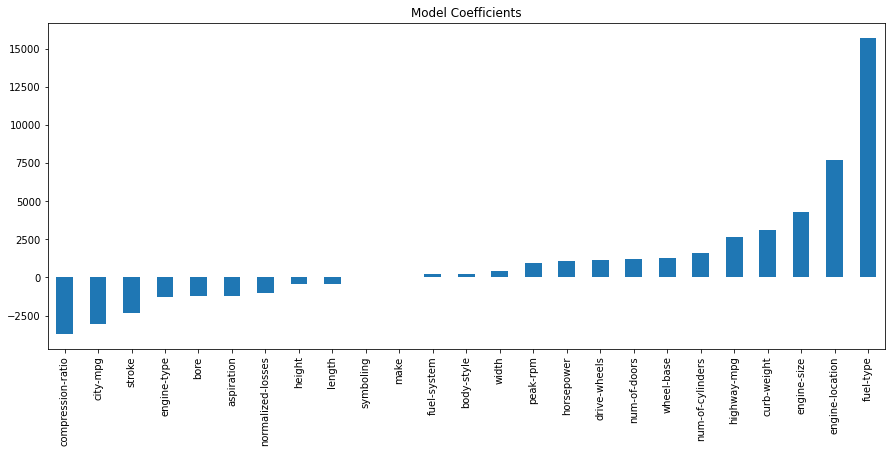

In [79]:
model = Lasso()
train(model, X, y)
coef = pd.Series(model.coef_, X.columns).sort_values()
plt.figure(figsize=(15,6))
coef.plot(kind='bar', title="Model Coefficients")

Model Report
RMSE: 2808.1869398045583
CV Score: 2565.780030522533


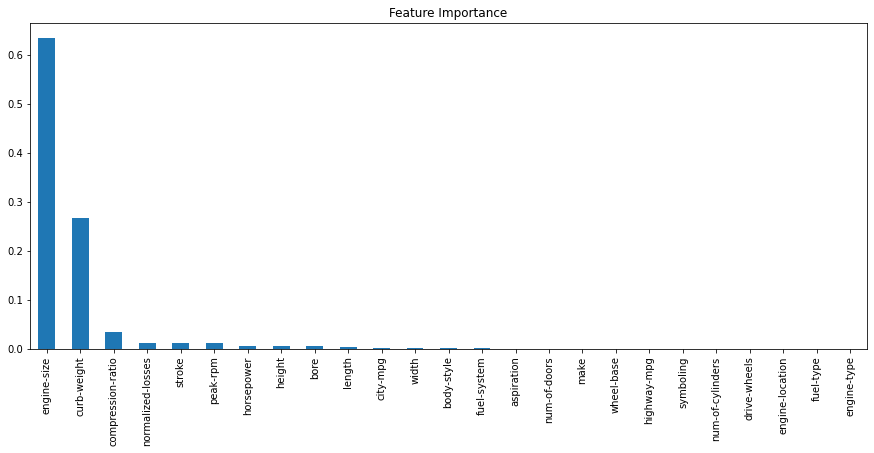

In [80]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,6))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 2300.229831696149
CV Score: 2217.815882845582


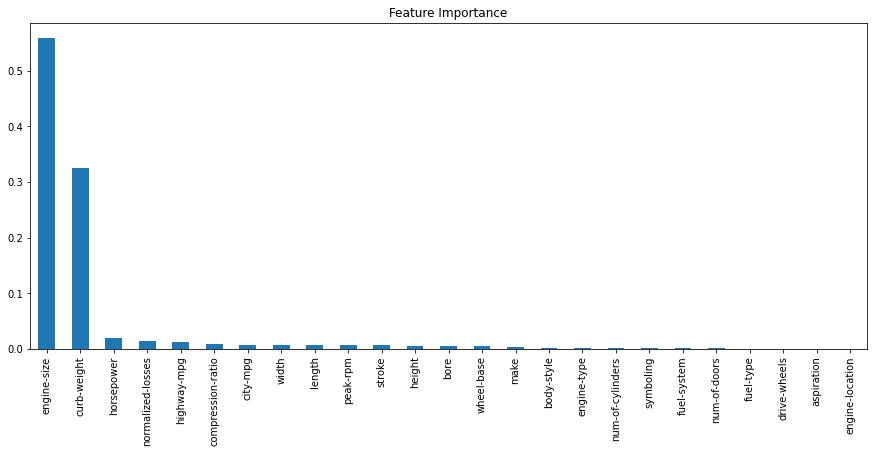

In [81]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,6))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 1950.6967476240663
CV Score: 2130.7759343247462


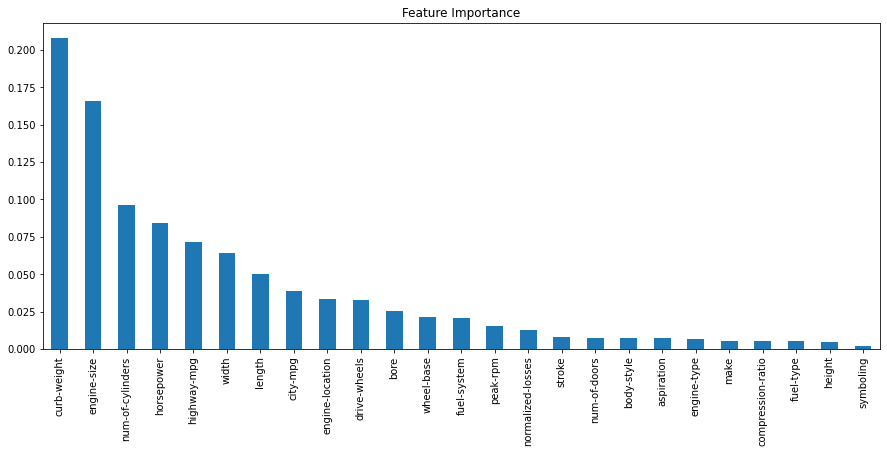

In [82]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(15,6))
coef.plot(kind='bar', title="Feature Importance")

[09:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[09:23:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Model Report
RMSE: 2239.6131512512984
CV Score: 2141.294841472987


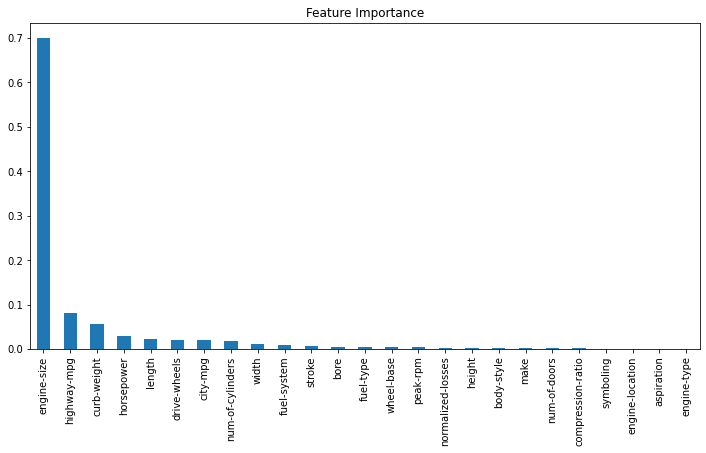

In [83]:
from xgboost import XGBRegressor
model = XGBRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

Model Report
RMSE: 2171.2352996975987
CV Score: 2068.372326601748


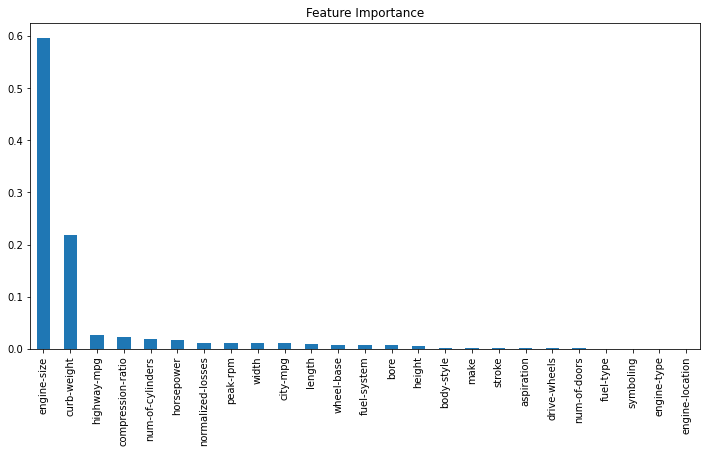

In [84]:
from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
train(model, X, y)
coef = pd.Series(model.feature_importances_, X.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
coef.plot(kind='bar', title="Feature Importance")

# Test set preprocessing

In [85]:
df1=pd.read_csv('car_test.csv')

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 20 non-null     int64  
 1   symboling          20 non-null     int64  
 2   normalized-losses  20 non-null     object 
 3   make               20 non-null     object 
 4   fuel-type          20 non-null     object 
 5   aspiration         20 non-null     object 
 6   num-of-doors       20 non-null     object 
 7   body-style         20 non-null     object 
 8   drive-wheels       20 non-null     object 
 9   engine-location    20 non-null     object 
 10  wheel-base         20 non-null     float64
 11  length             20 non-null     float64
 12  width              20 non-null     float64
 13  height             20 non-null     float64
 14  curb-weight        20 non-null     int64  
 15  engine-type        20 non-null     object 
 16  num-of-cylinders   20 non-nu

In [86]:
df1.replace('?', np.nan, inplace = True)

In [87]:
cols=['normalized-losses','bore','stroke','horsepower','peak-rpm']
for col in cols:
    df1[col] = df1[col].astype('float')

In [88]:
df1.drop(columns=['ID'],inplace=True)

In [89]:
df1[(missing_val)] = knn_imputer.transform(df1[(missing_val)])

In [ ]:
cat1=['symboling','make','fuel-type','aspiration','num-of-doors','body-style','drive-wheels','engine-location','engine-type','num-of-cylinders','fuel-system']

In [ ]:
num1=['normalized-losses','wheel-base','length','width','height','curb-weight','engine-size','bore','stroke','compression-ratio','horsepower','peak-rpm','city-mpg','highway-mpg']

In [90]:
for col in cat1:
    df1[col] = df1[col].astype('category')

In [91]:
df1[(num1)]=scaler.transform(df1[(num1)])

In [92]:
df1.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,-2,-0.567280,volvo,gas,std,four,sedan,rwd,front,0.905476,1.182767,0.581387,0.996945,0.658382,ohc,four,0.302549,mpfi,1.666088,-0.410196,-0.154369,0.240636,0.625934,-0.325542,-0.377329
1,0,1.925594,bmw,gas,std,four,sedan,rwd,front,0.399077,0.207420,-0.537126,0.233981,0.377913,ohc,six,0.842000,mpfi,-0.077295,-0.280183,-0.283346,0.424937,-1.821331,-0.638832,-0.377329
2,-1,-1.417789,volvo,gas,turbo,four,wagon,rwd,front,0.905476,1.182767,0.581387,1.518972,1.125830,ohc,four,0.044550,mpfi,1.072596,-0.410196,-0.670277,1.504416,-0.012483,-1.265412,-1.252602
3,1,0.928445,plymouth,gas,std,four,sedan,fwd,front,-0.826080,-0.564730,-1.003172,-1.171477,-1.102658,ohc,four,-0.893626,2bbl,-1.338466,-0.150169,-0.180164,-0.970487,0.838740,0.927619,1.081459
4,1,-0.567280,nissan,gas,std,four,wagon,fwd,front,-0.695397,-0.329021,-1.003172,-0.087266,-1.011076,ohc,four,-0.729445,2bbl,-0.670787,0.044851,-0.180164,-0.944158,0.200323,0.927619,0.935580


# Test set prediction

In [93]:
Z=df1

In [94]:
Z = oe.transform(Z)

In [95]:
Z.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,-0.567280,5,1,1,1,2,2,1,0.905476,1.182767,0.581387,0.996945,0.658382,1,1,0.302549,1,1.666088,-0.410196,-0.154369,0.240636,0.625934,-0.325542,-0.377329
1,2,1.925594,2,1,1,1,2,2,1,0.399077,0.207420,-0.537126,0.233981,0.377913,1,2,0.842000,1,-0.077295,-0.280183,-0.283346,0.424937,-1.821331,-0.638832,-0.377329
2,1,-1.417789,5,1,2,1,3,2,1,0.905476,1.182767,0.581387,1.518972,1.125830,1,1,0.044550,1,1.072596,-0.410196,-0.670277,1.504416,-0.012483,-1.265412,-1.252602
3,4,0.928445,18,1,1,1,2,1,1,-0.826080,-0.564730,-1.003172,-1.171477,-1.102658,1,1,-0.893626,4,-1.338466,-0.150169,-0.180164,-0.970487,0.838740,0.927619,1.081459
4,4,-0.567280,16,1,1,1,3,1,1,-0.695397,-0.329021,-1.003172,-0.087266,-1.011076,1,1,-0.729445,4,-0.670787,0.044851,-0.180164,-0.944158,0.200323,0.927619,0.935580


In [96]:
Final_pred = model.predict(Z)

In [97]:
prediction = pd.DataFrame(Final_pred).to_csv('submission.csv')